# Тестирование центральной предельной теоремы в виде свертки через преобразование Фурье

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

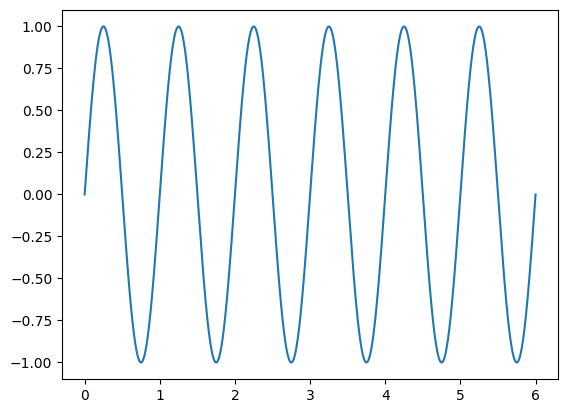

In [3]:
x= np.linspace(0,6,1000)
# unf = stats.uniform.pdf(x)
unf = np.sin(2*np.pi*x)

plt.plot(x,unf)

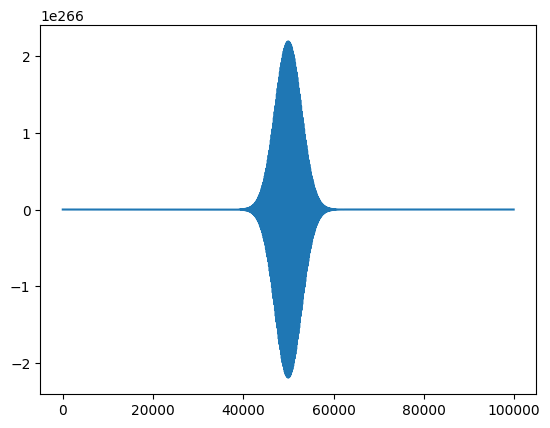

In [4]:
def conv(pdf,n):
    convolve_res = pdf
    for i in range(n-1):
        convolve_res = np.convolve(convolve_res,pdf)
    return convolve_res
        
plt.plot(conv(unf,100))

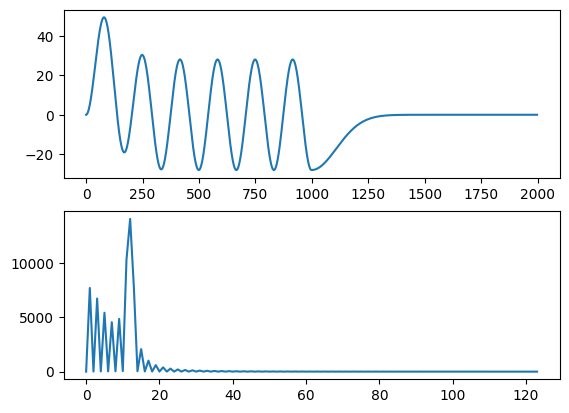

In [5]:
norm = np.exp(-x**2)
cnv=np.convolve(unf,norm)
plt.subplot(2,1,1)
plt.plot(cnv)
plt.subplot(2,1,2)
plt.plot(abs(np.fft.fft(cnv))[:cnv.size//16])

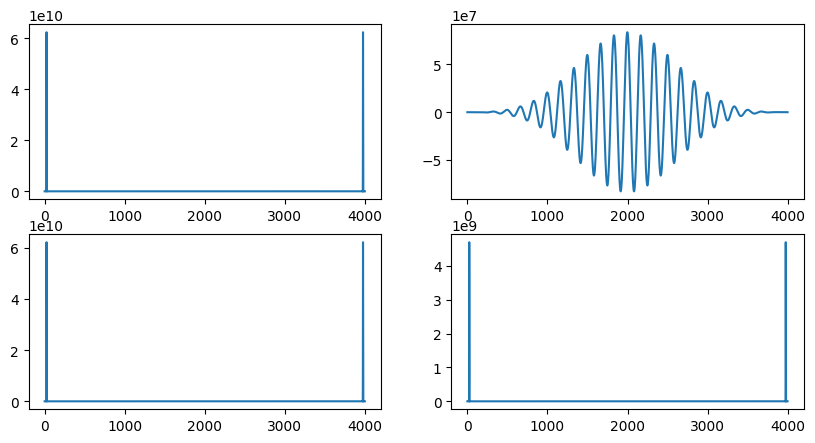

In [6]:
n=4
funf = np.fft.fft(unf,unf.size*n)
funf[abs(funf)<40]=0
funf = np.power(funf, n)

plt.figure(figsize=(10,5))

# Рисуем реальную часть преобразования Фурье
plt.subplot(2,2,1)
plt.plot(abs(funf[:funf.size]))

# Рисуем обратное преобразование Фурье
plt.subplot(2,2,2)
plt.plot(np.fft.ifft(funf).real)  # Берем реальную часть, т.к. результат может быть комплексным числом

plt.subplot(2,2,3)
plt.plot(abs(funf[:funf.size].real))

plt.subplot(2,2,4)
plt.plot(abs(funf[:funf.size].imag))

plt.show()

-3.552713678800501e-17 0.7067531393633848 1.7540702291724823 72.99821826365537
252.41466177194522


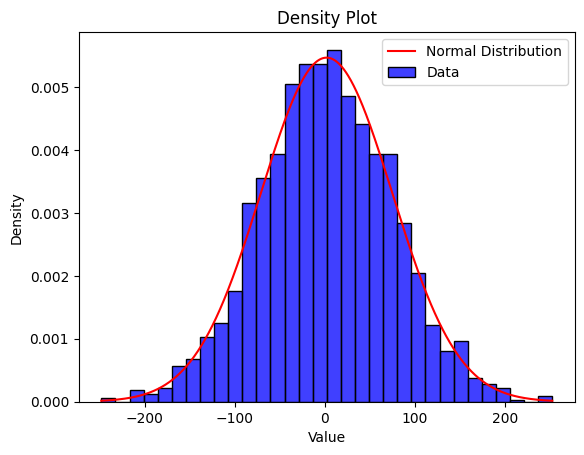

In [7]:
n= 10000

arr = np.zeros(2000)
for i in range(n):
    arr+= np.random.choice(unf, 2000)

print(unf.mean(), unf.std(), arr.mean(), arr.std())
print(arr.max())

x= np.linspace(arr.min(),arr.max(),1000)
sns.histplot(arr, color='blue', label='Data', stat = 'density')
plt.plot(x,stats.norm.pdf(x,loc= arr.mean(), scale= arr.std()), color='red', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot')
plt.legend()

plt.show()

In [8]:
arr = np.random.normal(size=2000)

print(stats.kstest(arr,'norm'))

KstestResult(statistic=0.01823418870115756, pvalue=0.5133146616579625, statistic_location=0.877033619969382, statistic_sign=1)


In [2]:
from ipywidgets import interact
import ipywidgets as widgets

# Создание массива значений x
x = np.linspace(0, 1, 100)

# Функция для отрисовки графика
def plot_func(change):
    plt.figure(figsize=(10, 4))
    y = np.sin(change*2*np.pi* x)
    plt.subplot(1,2,1)
    plt.plot(x, y)
    
    fft= np.fft.fft(y)
    plt.subplot(1,2,2)
    plt.plot(abs(fft)[:10])
    plt.xticks(np.arange(10))
    
    
    plt.show()

# Создание слайдера
slider = widgets.FloatSlider(
    value=1.0,
    min=0.0,
    max=5.0,
    step=0.1,
    description='Change:',
    continuous_update=True,
    layout=widgets.Layout(width='90%')
)

# Использование функции interact для создания интерактивного графика
interact(plot_func, change=slider);

interactive(children=(FloatSlider(value=1.0, description='Change:', layout=Layout(width='90%'), max=5.0), Outp…